# International COVID-19 Deaths

Data from:
https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/260bbbde-2316-40eb-aec3-7cd7bfc2f590


In [184]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
import pandas as pd
import io
import requests


### Pull data from opendata.ecdc.europa.eu (European Center for Disease Prevention and Control)

In [185]:

url="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

### Plot data

/Users/ph290/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(-40, 50)

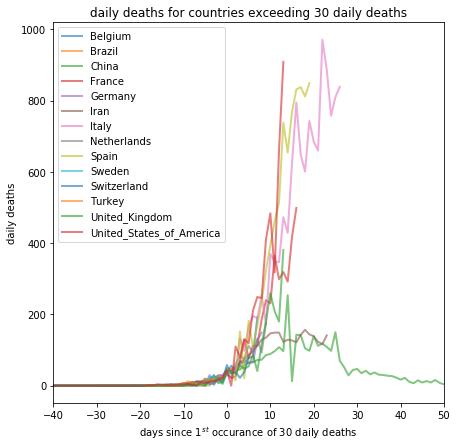

In [186]:
fig= plt.subplots(figsize=(7, 7))

daily_death_threshold = 30

for country in c.countriesAndTerritories.unique():
    c_country = c.loc[c['countriesAndTerritories'] == country]
    c_country['date'] = pd.to_datetime(c_country[['year', 'month', 'day']])
    loc = np.where(c_country.deaths.values > daily_death_threshold)[0]
    if len(loc > 0):
        days = (c_country.date - c_country.iloc[loc[-1]].date).dt.days
        plt.plot(days,c_country.deaths,label=country,lw=2,alpha=0.6)

plt.legend(loc=2)
plt.title('daily deaths for countries exceeding '+str(daily_death_threshold)+' daily deaths')
plt.xlabel('days since 1$^{st}$ occurance of '+str(daily_death_threshold)+' daily deaths')
plt.ylabel('daily deaths')
plt.xlim([-40,50])